# Part 2 of the TSMD 

[Mondher Farjallah ]



### 1) Load the 3H time series of San Francisco

The time series is provided in the file `./data/ts_cabs/sf_series_3h.csv`

The time series describes the number of stops in each tile of the administrative tessellation of San Francisco (see https://raw.githubusercontent.com/scikit-mobility/tutorials/master/mda_masterbd2020/data/bay_area_zip_codes.geojson)


In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
url = 'sf_series_3h.csv'
df_all = pd.read_csv(url, parse_dates=True, index_col='datetime')
df_all.head()

,tile_94002,tile_94005,tile_94010,tile_94014,tile_94015,tile_94019,tile_94022,tile_94024,tile_94025,tile_94028,...,tile_94803,tile_94804,tile_94806,tile_94901,tile_94904,tile_94925,tile_94939,tile_94941,tile_94960,tile_94965
datetime,,,,,,,,,,,,,,,,,,,,,
2008-05-17 09:00:00,0.0,1.0,1.0,1.0,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-05-17 12:00:00,0.0,1.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-05-17 15:00:00,1.0,3.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-05-17 18:00:00,0.0,0.0,3.0,2.0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-05-17 21:00:00,0.0,3.0,0.0,0.0,4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2) Similarity

Plot the Airport (`94128`), Downtown (`94107`), and Berkeley (`94710`) time series.
Then compute the timeseries' pairwise distance with:
- euclidean distance
- DTW

Repeat the computation on the normalized time series


In [ ]:
AIRPORT = 'tile_94128'
DOWNTOWN = 'tile_94107'
BERKELEY = 'tile_94710'
ts1 = df_all[AIRPORT][:-1] # airport
ts2 = df_all[DOWNTOWN][:-1] # downtown
ts3 = df_all[BERKELEY][:-1] # berkeley
plt.plot(ts1, label='airport')
plt.plot(ts2, label='downtown')
plt.plot(ts3, label='berkeley')
plt.ylabel('# taxi stops')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

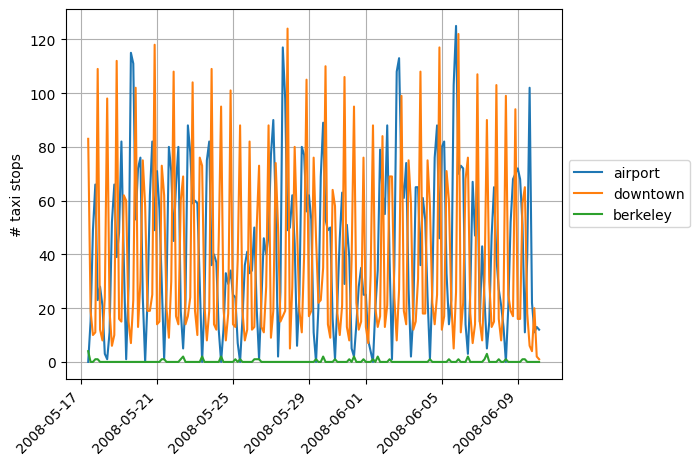

Euclidean Distance (Airport-Downtown): 702.3247112269366
Euclidean Distance (Airport-Berkeley): 711.1771931101277
Euclidean Distance (Downtown-Berkeley): 705.2609446155374
DTW Distance (Airport-Downtown): 358.1145068270762
DTW Distance (Airport-Berkeley): 670.2865059062431
DTW Distance (Downtown-Berkeley): 668.8161182268262


In [4]:
import numpy as np
from scipy.spatial.distance import euclidean
from tslearn.metrics import dtw

AIRPORT = 'tile_94128'
DOWNTOWN = 'tile_94107'
BERKELEY = 'tile_94710'

ts1 = df_all[AIRPORT][:-1]  
ts2 = df_all[DOWNTOWN][:-1]  
ts3 = df_all[BERKELEY][:-1]  


plt.plot(ts1, label='airport')
plt.plot(ts2, label='downtown')
plt.plot(ts3, label='berkeley')
plt.ylabel('# taxi stops')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

euclidean_dist_12 = euclidean(ts1, ts2)
euclidean_dist_13 = euclidean(ts1, ts3)
euclidean_dist_23 = euclidean(ts2, ts3)

dtw_dist_12 = dtw(ts1, ts2)
dtw_dist_13 = dtw(ts1, ts3)
dtw_dist_23 = dtw(ts2, ts3)


print('Euclidean Distance (Airport-Downtown):', euclidean_dist_12)
print('Euclidean Distance (Airport-Berkeley):', euclidean_dist_13)
print('Euclidean Distance (Downtown-Berkeley):', euclidean_dist_23)
print('DTW Distance (Airport-Downtown):', dtw_dist_12)
print('DTW Distance (Airport-Berkeley):', dtw_dist_13)
print('DTW Distance (Downtown-Berkeley):', dtw_dist_23)


### 3) Clustering

- Plot the all the time series;
- Apply the time series K-Means with three clusters using both "euclidean" and "dtw" as metric;
    - Do you find any improvement in the quality of the clustering? Why?


In [7]:
from tslearn.clustering import TimeSeriesKMeans

In [8]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(np.array(df_all.T.values))
len(df_all.T.values[0])

192

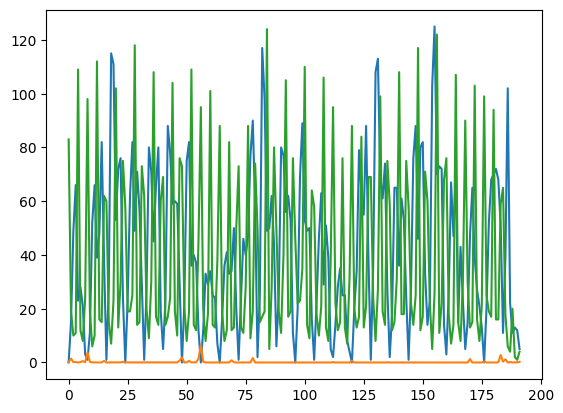

In [13]:

plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [10]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
list(km.labels_).index(2)

28

In [12]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5, random_state=0)
km.fit(np.array(df_all.T.values))
len(df_all.T.values[0])

192

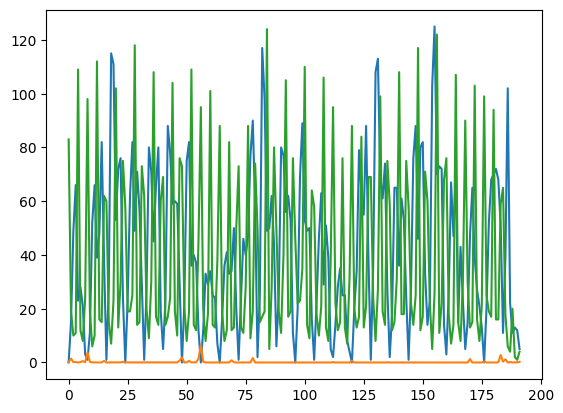

In [14]:
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

### 4) Time Series Forecasting

- Focus on the "Airport" time series;
- Apply the diff transformation and plot the transformed time series;
- Apply Holt, SimpleExpSmoothing, ExponentialSmoothing, ARIMA, and SARIMAX forecasting methods on the transformed time series and see if there are performance improvements;


apply the train-test split using 120 as split_index


In [17]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
ts1 = df_all[AIRPORT][:-1] # airport

<Axes: xlabel='datetime'>

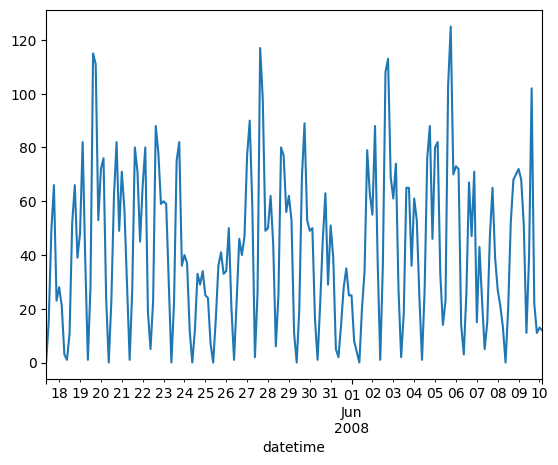

In [19]:
ts1.plot()

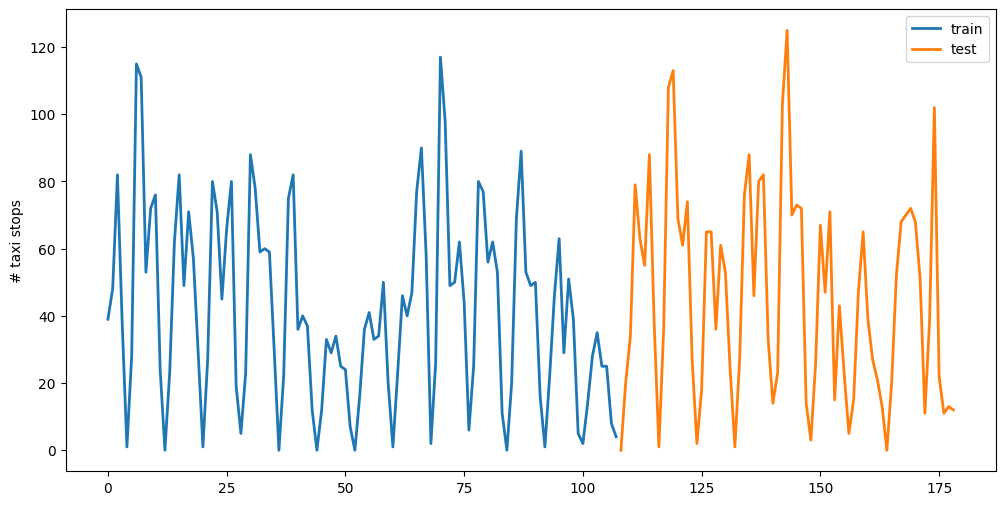

In [20]:
split_index = 120
train, test = ts1.iloc[12:split_index], ts1.iloc[split_index:]
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(range(len(train)), train, label='train', linewidth=2)
plt.plot(range(len(train), len(train)+len(test)), test, linewidth=2, label='test')
plt.ylabel('# taxi stops')
plt.legend()
plt.show()

### Simple Exponential Smoothing

C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)


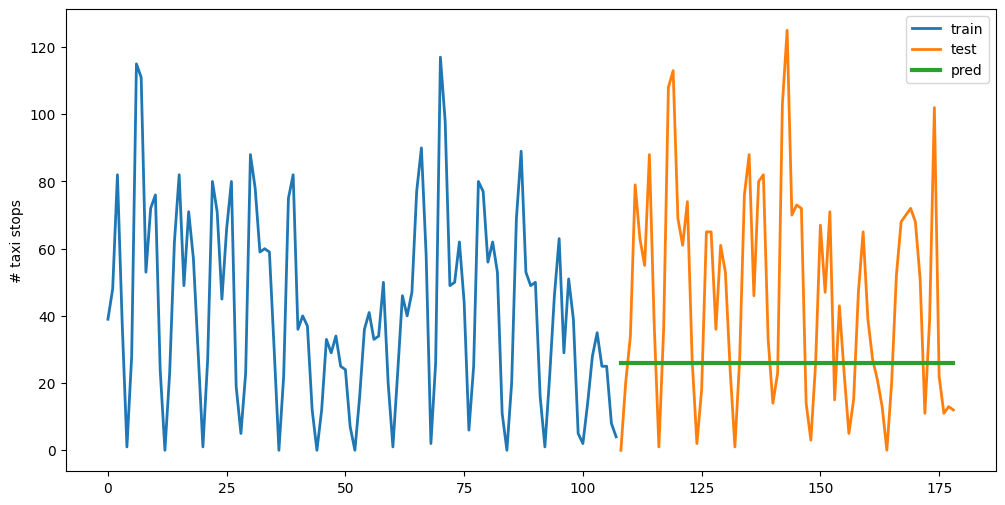

In [21]:
smoothing_level = 0.1
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=test.index[0], end=test.index[-1])
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(range(len(train)), train, label='train', linewidth=2)
plt.plot(range(len(train), len(train)+len(test)), test, label='test', linewidth=2)
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred', linewidth=3)
plt.ylabel('# taxi stops')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
def r2_score(y_true, y_pred, ts):
    mu = np.mean(ts)
    total = np.sum((y_true - mu) ** 2)
    residuals = np.sum((y_true - y_pred) ** 2)
    return 1 - (residuals / total)


def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, ts):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred, ts),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [25]:
for k, v in evaluate(test, pred, ts1).items():
    print('%s %.3f' % (k, v))

MAE 28.909
RMSE 36.715
MAD 24.884
R2 -0.388
MAPE 1.107
MAXAPE 3.786
TAPE 78.595


### Holt

C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)


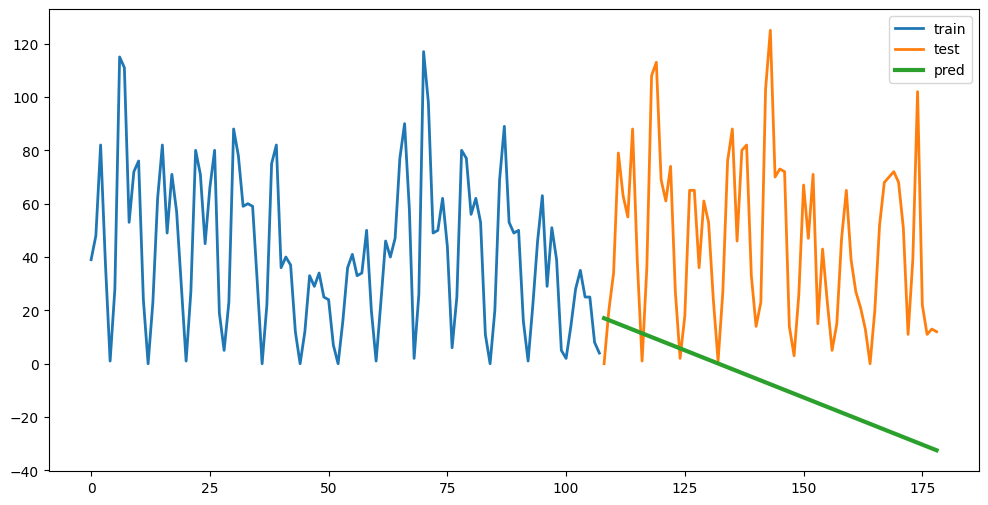

MAE 54.415
RMSE 62.345
MAD 51.496
R2 -3.002
MAPE 8.349
MAXAPE 58.362
TAPE 592.765


In [26]:
smoothing_level=0.1
smoothing_slope=1.2
holt = Holt(train).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
pred = holt.predict(start=test.index[0], end=test.index[-1])
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(range(len(train)), train, label='train', linewidth=2)
plt.plot(range(len(train), len(train)+len(test)), test, label='test', linewidth=2)
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred', linewidth=3)
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts1).items():
    print('%s %.3f' % (k, v))

Exponential Smoothing¶

C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)


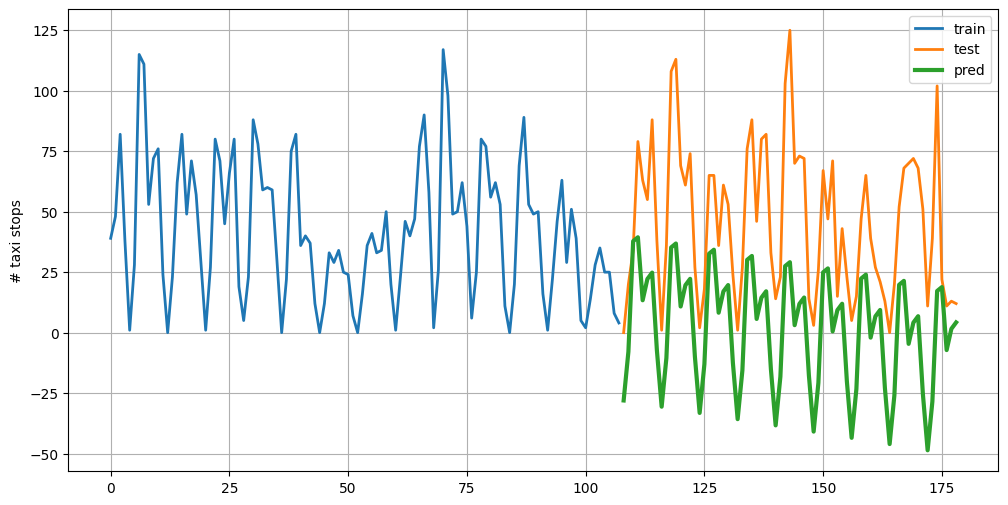

MAE 44.046
RMSE 48.207
MAD 42.615
R2 -1.393
MAPE 5.327
MAXAPE 137.807
TAPE 378.214


In [27]:
seasonal_periods=8

es = ExponentialSmoothing(train, seasonal_periods=seasonal_periods, trend='add', seasonal='add').fit()
pred = es.predict(start=test.index[0], end=test.index[-1])

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(range(len(train)), train, label='train', linewidth=2)
plt.plot(range(len(train), len(train)+len(test)), test, label='test', linewidth=2)
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred', linewidth=3)
plt.ylabel('# taxi stops')
plt.grid()
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts1).items():
    print('%s %.3f' % (k, v))

ARIMA

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)
C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)
C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)


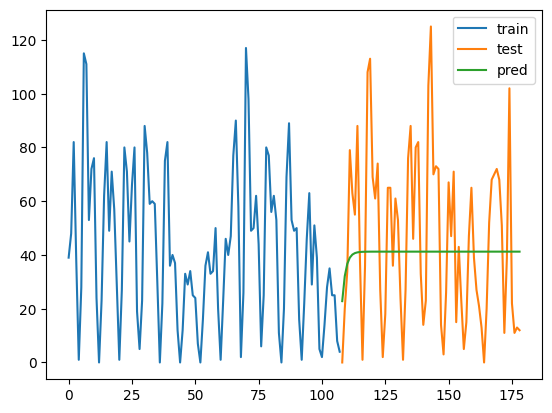

MAE 26.193
RMSE 31.018
MAD 26.235
R2 0.009
MAPE 0.644
MAXAPE 2.031
TAPE 45.723


In [29]:
arima = ARIMA(train, order=(1,0,0)).fit()
pred = arima.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts1).items():
    print('%s %.3f' % (k, v))

SARIMAX

C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)
C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)
C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


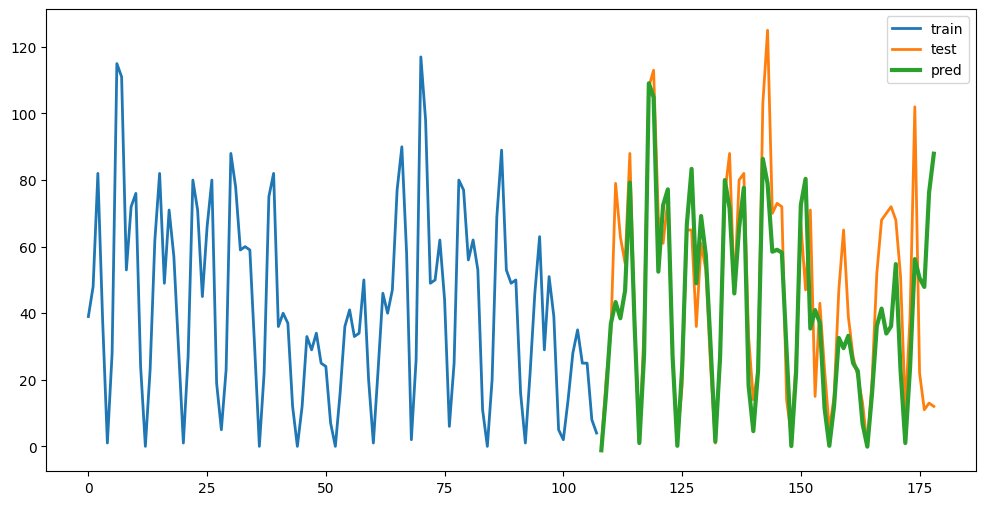

MAE 14.216
RMSE 20.890
MAD 8.750
R2 0.551
MAPE 1.572
MAXAPE 34.606
TAPE 111.616


In [30]:
sarimax = SARIMAX(train, order=(1,0,0), seasonal_order=(1, 1, 1, 56)).fit(disp=False)
pred = sarimax.predict(start=test.index[0], end=test.index[-1])
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(range(len(train)), train, label='train', linewidth=2)
plt.plot(range(len(train), len(train)+len(test)), test, label='test', linewidth=2)
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred', linewidth=3)
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts1).items():
    print('%s %.3f' % (k, v))

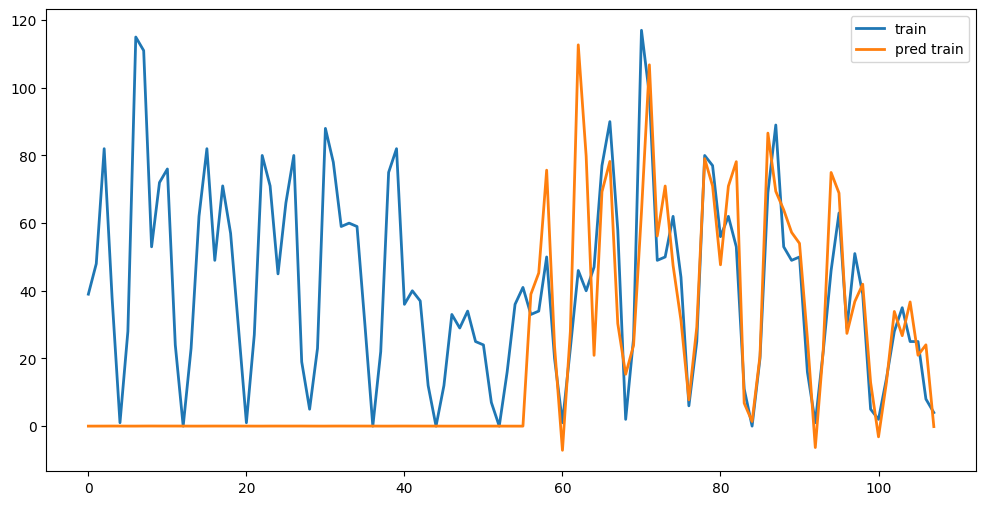

MAE 28.163
RMSE 39.389
MAD 19.295
R2 -0.919
MAPE inf
MAXAPE inf
TAPE inf


In [31]:
pred_train = sarimax.predict(start=train.index[0], end=train.index[-1])
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(range(len(train)), train, label='train', linewidth=2)
plt.plot(range(len(train)), pred_train, label='pred train', linewidth=2)
plt.legend()
plt.show()

for k, v in evaluate(train, pred_train, ts1).items():
    print('%s %.3f' % (k, v))

### 5) Recompute the clustering on the time series with the squared tessellation (BONUS, NOT MANDATORY)

- plot the time series;
- plot the cluster in the map;
- compare the results.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import skmob
from skmob.preprocessing import tessellation
from skmob.plotting import plot_gdf

# Define the tile size for the squared tessellation
tile_size = 0.1

# Apply the squared tessellation
tessellation_df = tessellation.square_grid(tdf, tile_size)

# Standardize the time series data
scaler = StandardScaler()
scaled_tdf = scaler.fit_transform(tdf['n_points'].values.reshape(-1, 1))

# Apply K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(scaled_tdf)
labels = kmeans.labels_

# Add cluster labels to the tessellation dataframe
tessellation_df['cluster'] = labels

# Plot the time series
plt.plot(tdf['datetime'], tdf['n_points'])
plt.xlabel('Time')
plt.ylabel('Number of Points')
plt.title('Time Series')
plt.grid(True)
plt.show()

# Create a map with the tessellation and cluster colors
m = folium.Map(location=[tdf['lat'].mean(), tdf['lng'].mean()], zoom_start=11, control_scale=True)
color_palette = ['red', 'blue', 'green']  # Define a color palette for the clusters

def style_function(feature):
    cluster_label = feature['properties']['cluster']
    return {'fillColor': color_palette[cluster_label], 'color': 'black'}

map_tess = plot_gdf(tessellation_df, m, style_function=style_function)

# Save the map as an HTML file
map_tess.save('cluster_map.html')

# Print the number of points in each cluster
print(tessellation_df['cluster'].value_counts())


ImportError: cannot import name 'tessellation' from 'skmob.preprocessing' (C:\Users\MSI\AppData\Roaming\Python\Python38\site-packages\skmob\preprocessing\__init__.py)